In [8619]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

In [8620]:
sns.set(font_scale=1.5)

pd.options.display.max_columns = 1000
pd.options.display.max_rows = 200
pd.options.display.max_colwidth = None

In [8621]:
df = pd.read_csv('Data/student-mat.csv', sep=';')

In [8622]:
display(df.head(), df.shape)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


(395, 33)

In [8623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

<b>Observation:</b>

16 int columns and 17 string

In [8624]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Checking for null values

In [8625]:
df.isna().sum().sum()

0

### Final grade distribution

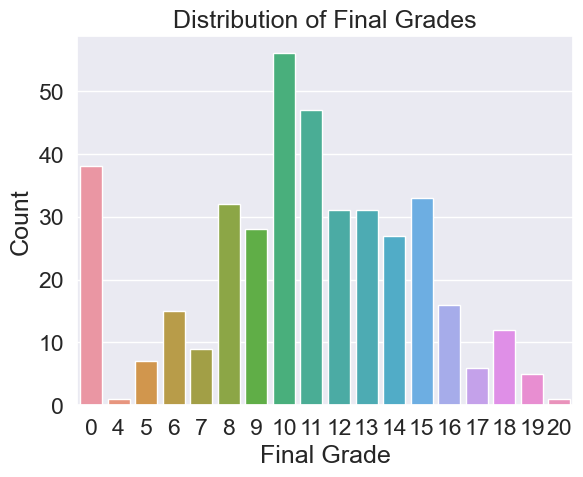

In [8626]:
sns.countplot(x='G3', data=df)
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

<b>Observation:</b>

The data seems to be normally distributed, apart from the 0 value, since there aren't any null values<br>
the 0 is probably for the students who didn't appear for the final exam.

### Checking and cleaning outliers

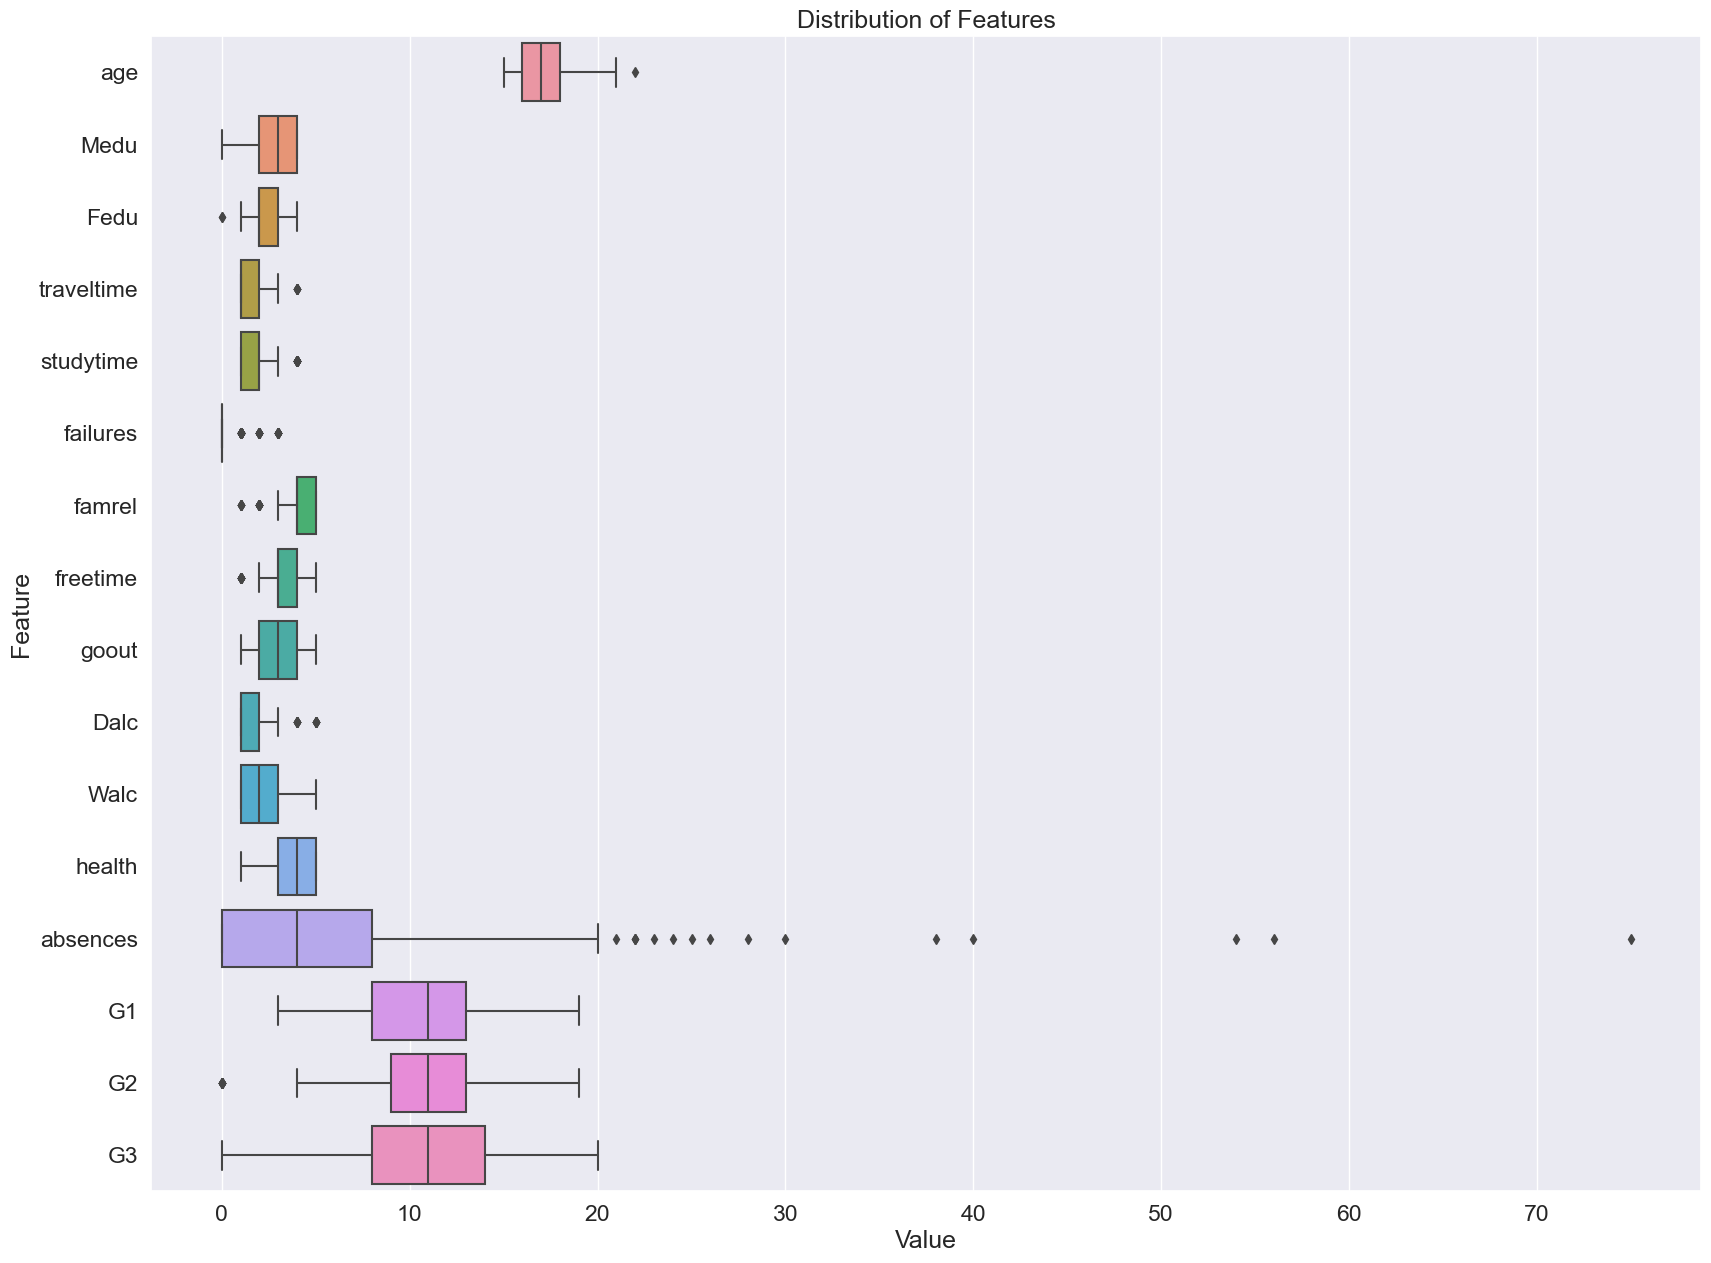

In [8627]:
fig = plt.figure(figsize=(20, 15))
sns.boxplot(data=df, orient='h')
plt.title('Distribution of Features')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

In [8628]:
df['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [8629]:
def compute_upper(df, up=True):
    iqr = df.quantile(.75) - df.quantile(.25)

    if up:
        return df.quantile(.75) + 1.5 * iqr
    return df.quantile(.25) - 1.5 * iqr

#### age

In [8630]:
x_age = df['age']
sex_up_lim = compute_upper(x_age)
df[x_age > sex_up_lim]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
247,GP,M,22,U,GT3,T,3,1,services,services,other,mother,1,1,3,no,no,no,no,no,no,yes,yes,5,4,5,5,5,1,16,6,8,8


<b>Observation:</b>

This student with age 22 seems to be a natural outlier based on certain factors:<br>
The student has scored low on G1, G2<br>
Has health issues<br>
Drinks alcohol on the weekend and weekdays<br>
His father is very low educated<br>
His study time is only 1 - 2 hours a week, which is very low.<br>
Has failed 3 times.

Student is basically a "bad" student

That the student is 22 years old in a class where the average age is ~16.5 years old, can be explained by the above,<br>
so we will leave this observation.

#### Father's education

In [8631]:
x_fedu = df['Fedu']
fedu_low_lim = compute_upper(x_fedu, False)
print(fedu_low_lim)
df[x_fedu < fedu_low_lim]

0.5


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
76,GP,M,15,U,GT3,T,4,0,teacher,other,course,mother,2,4,0,no,no,no,yes,yes,yes,yes,no,3,4,3,1,1,1,8,11,11,10
171,GP,M,16,U,GT3,T,1,0,other,other,reputation,mother,2,2,0,no,yes,yes,yes,yes,yes,yes,yes,4,3,2,1,1,3,2,13,15,16


<b>Observation</b>

Father's educatin of 0 basically no education can be natural. not sure

#### Travel time

In [8632]:
x_travel = df['traveltime']
travel_up_lim = compute_upper(x_travel)
df[x_travel > travel_up_lim]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
61,GP,F,16,U,GT3,T,1,1,services,services,course,father,4,1,0,yes,yes,no,yes,no,yes,yes,yes,5,5,5,5,5,5,6,10,8,11
108,GP,M,15,R,GT3,T,4,4,other,other,home,father,4,4,0,no,yes,yes,yes,yes,yes,yes,yes,1,3,5,3,5,1,6,10,13,13
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,course,mother,4,2,0,no,yes,no,no,yes,yes,no,yes,5,3,3,1,1,5,0,9,0,0
149,GP,M,15,U,LE3,A,2,1,services,other,course,mother,4,1,3,no,no,no,no,yes,yes,yes,no,4,5,5,2,5,5,0,8,9,10
164,GP,M,17,R,LE3,T,1,1,other,services,course,mother,4,2,3,no,no,no,yes,yes,no,no,yes,5,3,5,1,5,5,0,5,8,7
228,GP,M,18,U,LE3,T,2,1,at_home,other,course,mother,4,2,0,yes,yes,yes,yes,yes,yes,yes,yes,4,3,2,4,5,3,14,10,8,9
327,GP,M,17,R,GT3,T,2,2,services,other,course,mother,4,1,0,no,yes,no,no,yes,yes,yes,no,4,4,5,5,5,4,8,11,10,10
375,MS,F,18,R,GT3,T,1,1,other,other,home,mother,4,3,0,no,no,no,no,yes,yes,yes,no,4,3,2,1,2,4,2,8,8,10


<b>Observation:</b>

We will remove row 108 and 375, with travel time of 4. Because if we look at the reason the student chose the school it says 'home' as in close to home.

In [8633]:
df.drop([108, 375], inplace=True)

#### Study time

In [8634]:
x_studytime = df['studytime']
study_up_lim = compute_upper(x_studytime)
df[x_studytime > study_up_lim]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
47,GP,M,16,U,GT3,T,4,3,health,services,reputation,mother,1,4,0,no,no,no,yes,yes,yes,yes,no,4,2,2,1,1,2,4,19,19,20
66,GP,M,15,U,GT3,A,4,4,other,services,reputation,mother,1,4,0,no,yes,no,yes,no,yes,yes,yes,1,3,3,5,5,3,4,13,13,12
67,GP,F,16,U,GT3,T,3,1,services,other,course,mother,1,4,0,yes,yes,yes,no,yes,yes,yes,no,4,3,3,1,2,5,4,7,7,6
69,GP,F,15,R,LE3,T,3,1,other,other,reputation,father,2,4,0,no,yes,no,no,no,yes,yes,no,4,4,2,2,3,3,12,16,16,16
70,GP,M,16,U,GT3,T,3,1,other,other,reputation,father,2,4,0,no,yes,yes,no,yes,yes,yes,no,4,3,2,1,1,5,0,13,15,15
71,GP,M,15,U,GT3,T,4,2,other,other,course,mother,1,4,0,no,no,no,no,yes,yes,yes,no,3,3,3,1,1,3,0,10,10,10
76,GP,M,15,U,GT3,T,4,0,teacher,other,course,mother,2,4,0,no,no,no,yes,yes,yes,yes,no,3,4,3,1,1,1,8,11,11,10
77,GP,F,16,U,GT3,T,2,2,other,other,reputation,mother,1,4,0,no,no,yes,no,yes,yes,yes,yes,5,2,3,1,3,3,0,11,11,11
94,GP,M,15,U,LE3,T,2,2,services,health,reputation,mother,1,4,0,no,yes,no,yes,yes,yes,yes,no,4,3,4,1,1,4,6,11,13,14
95,GP,F,15,R,GT3,T,1,1,at_home,other,home,mother,2,4,1,yes,yes,yes,yes,yes,yes,yes,no,3,1,2,1,1,1,2,7,10,10


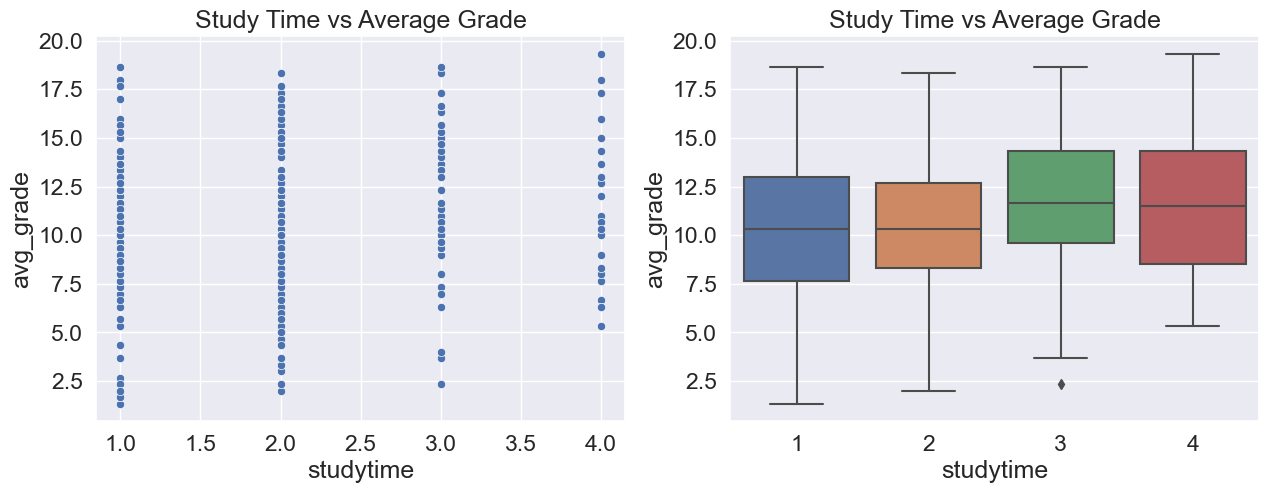

In [8635]:
# create an average grade column
df_avg_grade = df.copy()
df_avg_grade['avg_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3
df_avg_grade

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=df_avg_grade, x='studytime', y='avg_grade', ax=ax[0])
sns.boxplot(data=df_avg_grade, x='studytime', y='avg_grade', ax=ax[1])
ax[0].set_title('Study Time vs Average Grade')
ax[1].set_title('Study Time vs Average Grade')
plt.show()


<b>Observation:</b>

We can see that all the students are from 'GP' school and all of these students are persuing higher education.<br>
These student's might be extra motivated hence the longer study hours. 

From the boxplot we can observe that the minimum value of studytime 4 is higher then 3, the 25th percentile is lower, the median is almost the same and the 75th percentale is the same.<br>
This may indicate that studying longer then a few hours as diminishing returns.

This outliers seem natural and we will not remove them. 

#### Failures

In [8636]:
df['failures'].unique()

array([0, 3, 2, 1])

In [8637]:
x_failures = df['failures']
failures_up_lim = compute_upper(x_failures)
print(failures_up_lim)
display(df[x_failures > failures_up_lim].head(), df[x_failures > failures_up_lim].shape)

0.0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
18,GP,M,17,U,GT3,T,3,2,services,services,course,mother,1,1,3,no,yes,no,yes,yes,yes,yes,no,5,5,5,2,4,5,16,6,5,5
25,GP,F,16,U,GT3,T,2,2,services,services,home,mother,1,1,2,no,yes,yes,no,no,yes,yes,no,1,2,2,1,3,5,14,6,9,8
40,GP,F,16,U,LE3,T,2,2,other,other,home,mother,2,2,1,no,yes,no,yes,no,yes,yes,yes,3,3,3,1,2,3,25,7,10,11
44,GP,F,16,U,LE3,T,2,2,other,at_home,course,father,2,2,1,yes,no,no,yes,yes,yes,yes,no,4,3,3,2,2,5,14,10,10,9


(83, 33)

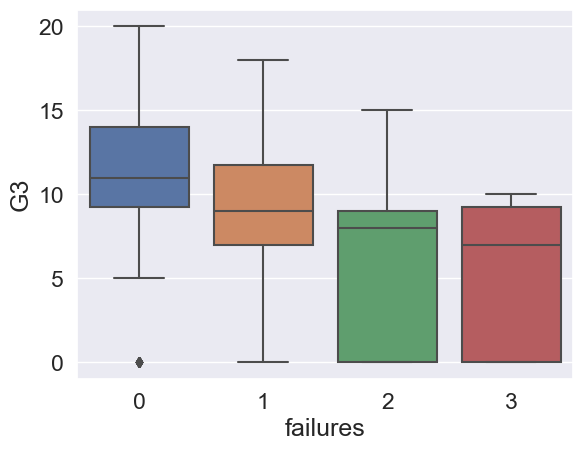

In [8638]:
sns.boxplot(data=df, x='failures', y='G3')
plt.show()

In [8639]:
x_absences = df['absences']
absences_up_lim = compute_upper(x_absences)
df[x_absences > absences_up_lim]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
40,GP,F,16,U,LE3,T,2,2,other,other,home,mother,2,2,1,no,yes,no,yes,no,yes,yes,yes,3,3,3,1,2,3,25,7,10,11
74,GP,F,16,U,GT3,T,3,3,other,services,home,mother,1,2,0,yes,yes,yes,yes,yes,yes,yes,no,4,3,3,2,4,5,54,11,12,11
103,GP,F,15,U,GT3,T,3,2,services,other,home,mother,2,2,0,yes,yes,yes,no,yes,yes,yes,no,4,3,5,1,1,2,26,7,6,6
183,GP,F,17,U,LE3,T,3,3,other,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,yes,5,3,3,2,3,1,56,9,9,8
198,GP,F,17,U,GT3,T,4,4,services,teacher,home,mother,2,1,1,no,yes,no,no,yes,yes,yes,no,4,2,4,2,3,2,24,18,18,18
205,GP,F,17,U,GT3,T,3,4,at_home,services,home,mother,1,3,1,no,yes,yes,no,yes,yes,yes,yes,4,4,3,3,4,5,28,10,9,9
216,GP,F,17,U,GT3,T,4,3,other,other,reputation,mother,1,2,2,no,no,yes,no,yes,yes,yes,yes,3,4,5,2,4,1,22,6,6,4
260,GP,F,18,U,GT3,T,4,3,services,other,home,father,1,2,0,no,yes,yes,no,yes,yes,yes,yes,3,1,2,1,3,2,21,17,18,18
276,GP,F,18,R,GT3,A,3,2,other,services,home,mother,2,2,0,no,no,no,no,no,no,yes,yes,4,1,1,1,1,5,75,10,9,9
277,GP,M,18,U,GT3,T,4,4,teacher,services,home,mother,2,1,0,no,no,yes,yes,yes,yes,yes,no,3,2,4,1,4,3,22,9,9,9


<b>Observations:</b>

We will all failures except for row (103, 183, 198, 216 260, 313), these are students with bad health<br>
and there abscenses can be due to their bad health.

In [8640]:
df.drop([103, 183, 198, 216, 260, 313], inplace=True)

In [8641]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [8642]:
df_binary1 = df_cat.iloc[:,0:5]
df_binary2 = df_cat.iloc[:,9:]
display(df_binary1.head(), df_binary2.head())

,school,sex,address,famsize,Pstatus
0,GP,F,U,GT3,A
1,GP,F,U,GT3,T
2,GP,F,U,LE3,T
3,GP,F,U,GT3,T
4,GP,F,U,GT3,T


,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,yes,no,no,no,yes,yes,no,no
1,no,yes,no,no,no,yes,yes,no
2,yes,no,yes,no,yes,yes,yes,no
3,no,yes,yes,yes,yes,yes,yes,yes
4,no,yes,yes,no,yes,yes,no,no


In [8643]:
df_binary = pd.concat([df_binary1, df_binary2], axis=1)
df_binary.head()

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,no,yes,yes,no,yes,yes,no,no


### Relation ship between a parent's education and final grade

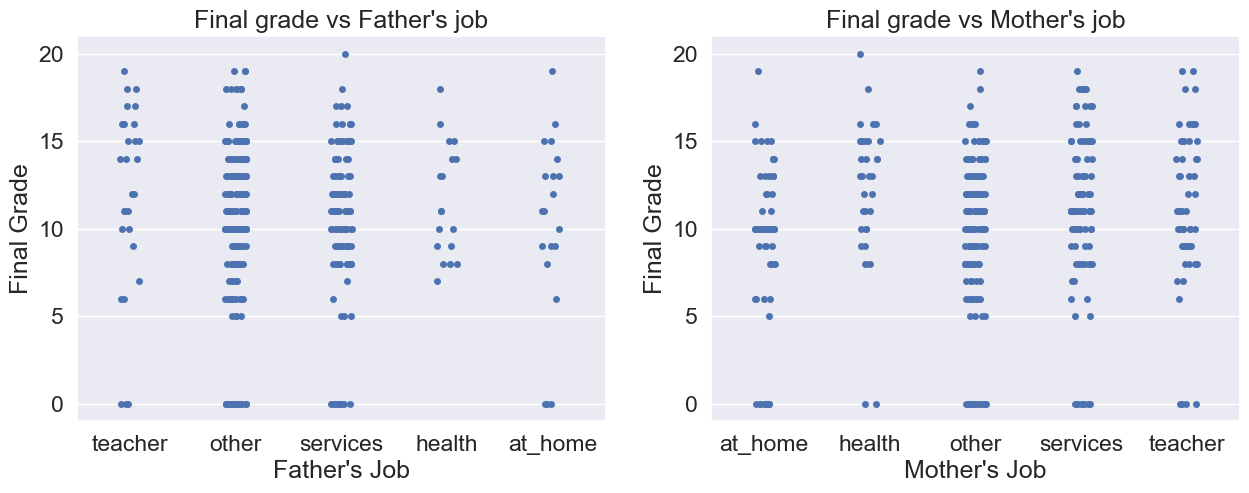

In [8644]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.stripplot(x='Fjob', y='G3', data=df, ax=ax[0])
sns.stripplot(x='Mjob', y='G3', data=df, ax=ax[1])

ax[0].set_xlabel('Father\'s Job')
ax[0].set_ylabel('Final Grade')
ax[0].set_title('Final grade vs Father\'s job')
ax[1].set_xlabel('Mother\'s Job')
ax[1].set_ylabel('Final Grade')
ax[1].set_title('Final grade vs Mother\'s job')
plt.show()

<b>Observation:</b>

There seems to be no relationship between a parent's education and the final grade

### Relationship between travel time and final grade

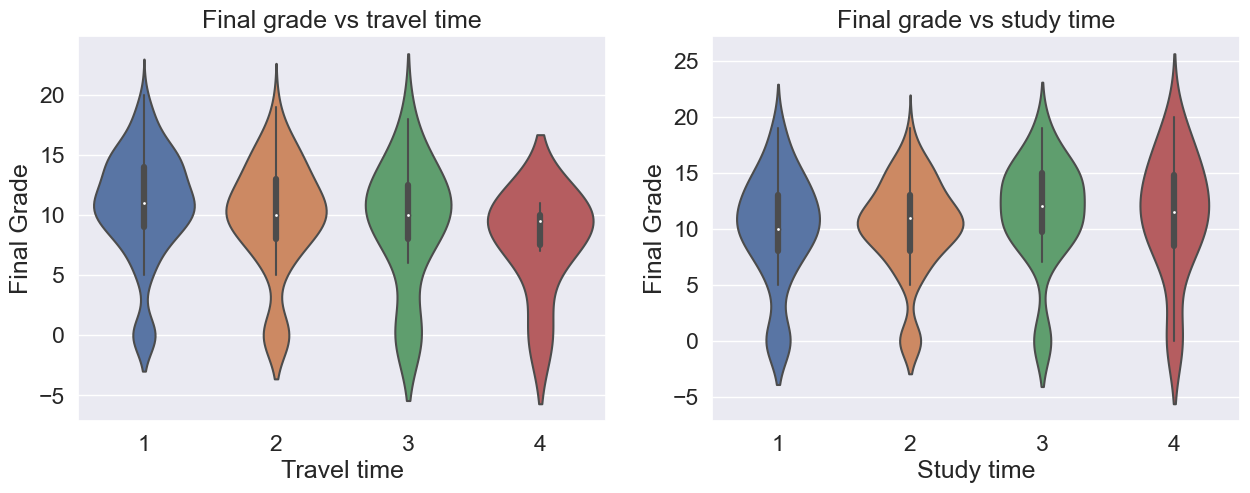

In [8645]:
# We can use a violin plot or box plot since we are checking for the relationship between ordinal and continuous variables.

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot(x='traveltime', y='G3', data=df, ax=ax[0])
sns.violinplot(x='studytime', y='G3', data=df, ax=ax[1])

ax[0].set_xlabel('Travel time')
ax[0].set_ylabel('Final Grade')
ax[0].set_title('Final grade vs travel time')
ax[1].set_xlabel('Study time')
ax[1].set_ylabel('Final Grade')
ax[1].set_title('Final grade vs study time')
plt.show()

<b>Observation:</b>

There seem to be a correlation betwween travel time and final grade, as students who travel longer have lower grades<br>
There is alos a correlation between study time and final grade, as the students who study for longer have higher grades

It would be interesting to check the relationship between travel time and study time

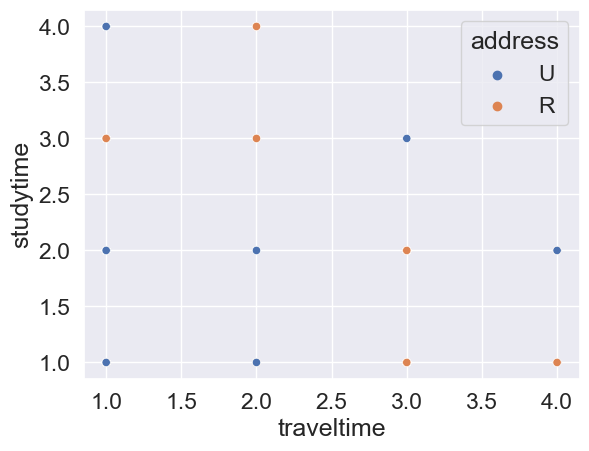

In [8646]:
# We can use scatterplot between two ordinal variables.
sns.scatterplot(data=df, x='traveltime', y='studytime', hue='address')
plt.show()

<b>Observation</b>

There seems to be no relationship between travel time and study time

### Impact of Internet access at home on the final grade

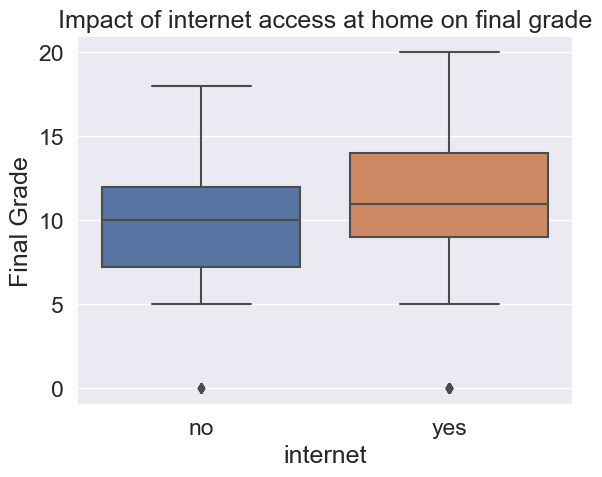

In [8647]:
sns.boxplot(data=df, x='internet', y='G3')
plt.title('Impact of internet access at home on final grade')
plt.ylabel('Final Grade')
plt.show()

<b>Observation:</b>

Student with access to the internet at home score better on average.

In [8648]:
df_binary.head()

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,no,yes,yes,no,yes,yes,no,no


In [8649]:
for cols in df_binary.columns:
    le = LabelEncoder()
    df[cols] = le.fit_transform(df[cols])

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [8650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      387 non-null    int64 
 1   sex         387 non-null    int64 
 2   age         387 non-null    int64 
 3   address     387 non-null    int64 
 4   famsize     387 non-null    int64 
 5   Pstatus     387 non-null    int64 
 6   Medu        387 non-null    int64 
 7   Fedu        387 non-null    int64 
 8   Mjob        387 non-null    object
 9   Fjob        387 non-null    object
 10  reason      387 non-null    object
 11  guardian    387 non-null    object
 12  traveltime  387 non-null    int64 
 13  studytime   387 non-null    int64 
 14  failures    387 non-null    int64 
 15  schoolsup   387 non-null    int64 
 16  famsup      387 non-null    int64 
 17  paid        387 non-null    int64 
 18  activities  387 non-null    int64 
 19  nursery     387 non-null    int64 
 20  higher    

###  Find top 3 highly correlated numerical and categorical features with the target variable.

In [8651]:
df_num = df.select_dtypes(include=['int64',])

In [8652]:
df_cat = df.select_dtypes(include=['object',])
df_cat.head()

,Mjob,Fjob,reason,guardian
0,at_home,teacher,course,mother
1,at_home,other,course,father
2,at_home,other,other,mother
3,health,services,home,mother
4,other,other,home,father


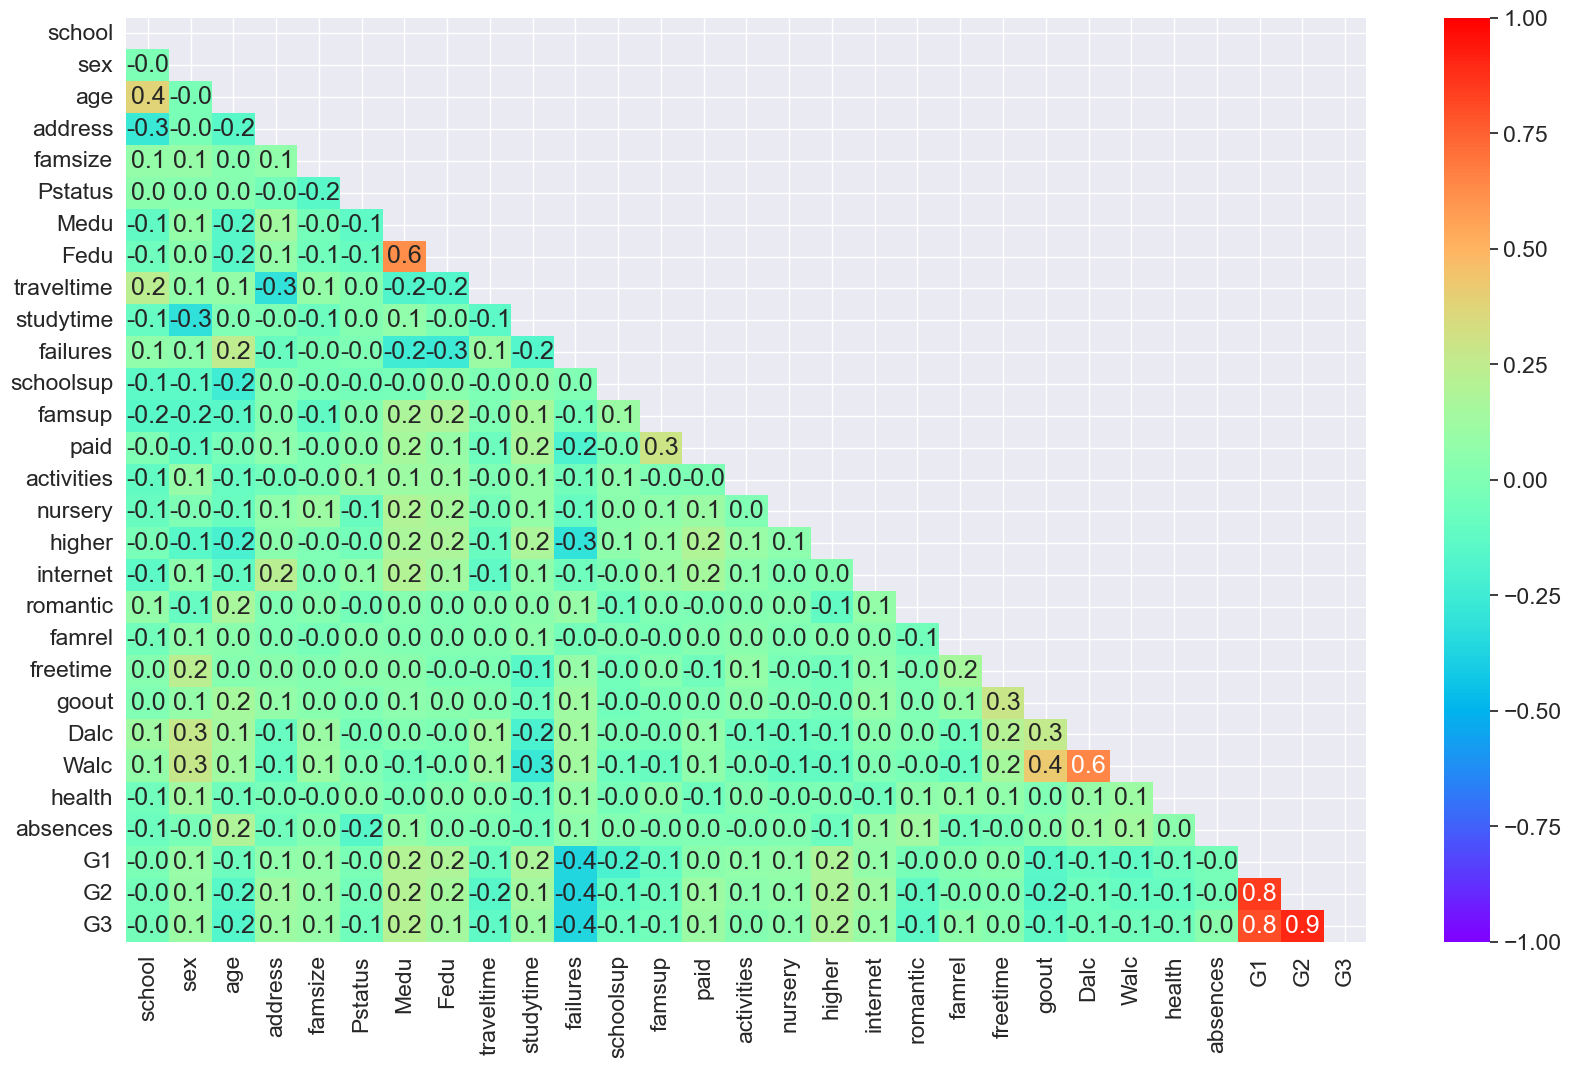

In [8653]:
df_corr = df_num.corr()
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_corr, mask=mask, vmin=-1, vmax=1, annot=True, fmt='.1f', cmap='rainbow', ax=ax)
plt.show()

<b>Observation:</b>

Collinearity - G1 And G2 are highly correllated with the target variable G3.</br>
MultiCollinearity - G1 and G2 are highly correlated either we remove one or merge them together into a new feature.<br>
Other - There is also some collinearity between drinking on the weekend and drinking on weekdays and between the mother's education and the father's education.

We should use other methods (VIF) to be sure.

<b>VIF (Variance Inflation Factor)</b>

Determines the strength of the correlation between the independent variables.<br> It is predicted by taking a variable and regressing it against every other variable.
It strictly works on numeric data

VIF - starts at 1<br>
VIF = 1 no correlation between independent and other variables<br>
VIF exceeding 5 or 10 indicates high multicollinearity between independent and other variables<br>


In [8654]:
# Assign ranks to the grades
df_rank = df.copy()
df_rank['rank'] = df_rank['G3'].rank(method='min')

# Calculate Spearman's rank correlation coefficient
def spearman_r(df):
    for col in df_cat.columns:
        corr_coef, p_value = spearmanr(df_rank[col], df_rank['rank'])
        print('Spearman\'s rank for: {}'.format(col))
        print('correlation coefficient:', corr_coef)
        print('p-value:', p_value)
        print('==================')

In [8655]:
spearman_r(df_cat)

Spearman's rank for: Mjob
correlation coefficient: 0.08581493560851035
p-value: 0.09182880571352207
Spearman's rank for: Fjob
correlation coefficient: 0.039925838206504104
p-value: 0.4335065553222167
Spearman's rank for: reason
correlation coefficient: 0.1186028395135708
p-value: 0.019601570981885547
Spearman's rank for: guardian
correlation coefficient: -0.06560315083198262
p-value: 0.19782297328438037


<b>Observation:</b>

No high correlation between the categorical features and target value

### Feature Engineering

In [8656]:
df_num_alc = df_num.copy()
df_num_alc.insert(len(df_num.columns) - 6, 'alcohol', round((df_num_alc['Dalc'] + df_num_alc['Walc']) / 2))
df_num_alc.drop(['Dalc', 'Walc'], axis=1, inplace=True)

In [8657]:
df_num2 = df_num_alc.copy()
df_num2.insert(2, 'parental_edu', round((df_num2['Medu'] + df_num2['Fedu']) / 2))
df_num2.drop(['Medu', 'Fedu'], axis=1, inplace=True)

In [8658]:
df_num3 = df_num2.copy()
df_num3.insert(len(df_num3.columns) - 1, 'G1_G2', round((df_num3['G1'] + df_num3['G2']) / 2))
df_num3.drop(['G1', 'G2'], axis=1, inplace=True)

In [8659]:
new_df = df_cat.join(df_num3)
new_df.head()

,Mjob,Fjob,reason,guardian,school,sex,parental_edu,age,address,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,alcohol,health,absences,G1_G2,G3
0,at_home,teacher,course,mother,0,0,4.0,18,1,0,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1.0,3,6,6.0,6
1,at_home,other,course,father,0,0,1.0,17,1,0,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1.0,3,4,5.0,6
2,at_home,other,other,mother,0,0,1.0,15,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2.0,3,10,8.0,10
3,health,services,home,mother,0,0,3.0,15,1,0,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1.0,5,2,14.0,15
4,other,other,home,father,0,0,3.0,16,1,0,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,2.0,5,4,8.0,10


In [8660]:
def dummy_encode(df, col_names):
  df_encoded  = df.copy()

  for col in col_names:
    index = df_encoded.columns.get_loc(col)
    dummy_encoded = pd.get_dummies(df_encoded[col], prefix=col)
    df_encoded = pd.concat([df_encoded.iloc[:, : index], dummy_encoded, df_encoded.iloc[:, index :]], axis=1)
    df_encoded.drop(df.columns[index], axis=1, inplace=True)
    
  return df_encoded

In [8661]:
col_to_encode = ['guardian', 'reason','Fjob','Mjob']
df_encoded = dummy_encode(new_df, col_to_encode )
df_encoded.head()

,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,school,sex,parental_edu,age,address,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,alcohol,health,absences,G1_G2,G3
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,4.0,18,1,0,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1.0,3,6,6.0,6
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1.0,17,1,0,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1.0,3,4,5.0,6
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1.0,15,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2.0,3,10,8.0,10
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,3.0,15,1,0,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1.0,5,2,14.0,15
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,3.0,16,1,0,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,2.0,5,4,8.0,10


In [8662]:
col_to_scaled = ['age', 'parental_edu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'alcohol', 'G1_G2']
df_scaled = df_encoded.copy()

scaler = StandardScaler(with_std=True, with_mean=True)
# scaler = MinMaxScaler()
for col in col_to_scaled:
    df_scaled[col] = scaler.fit_transform(df_scaled[col].values.reshape(-1, 1))

In [8663]:
display(df_scaled.head(), df_scaled.shape)

,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,school,sex,parental_edu,age,address,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,alcohol,health,absences,G1_G2,G3
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1.255559,1.029417,1,0,0,0.836597,-0.037012,-0.445132,1,0,0,0,1,1,0,0,0.052378,-0.248969,0.813319,-0.933800,-0.431584,0.086015,-1.428892,6
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,-1.630983,0.243649,1,0,1,-0.641773,-0.037012,-0.445132,0,1,0,0,0,1,1,0,1.178511,-0.248969,-0.091148,-0.933800,-0.431584,-0.184617,-1.725238,6
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,-1.630983,-1.327887,1,1,1,-0.641773,-0.037012,3.592354,1,0,1,0,1,1,1,0,0.052378,-0.248969,-0.995615,0.078471,-0.431584,0.627277,-0.836201,10
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0.293378,-1.327887,1,0,1,-0.641773,1.156614,-0.445132,0,1,1,1,1,1,1,1,-1.073755,-1.252624,-0.995615,-0.933800,1.027132,-0.455248,0.941874,15
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0.293378,-0.542119,1,0,1,-0.641773,-0.037012,-0.445132,0,1,1,0,1,1,0,0,0.052378,-0.248969,-0.995615,0.078471,1.027132,-0.184617,-0.836201,10


(387, 43)

### Dimensionality reduction using corr

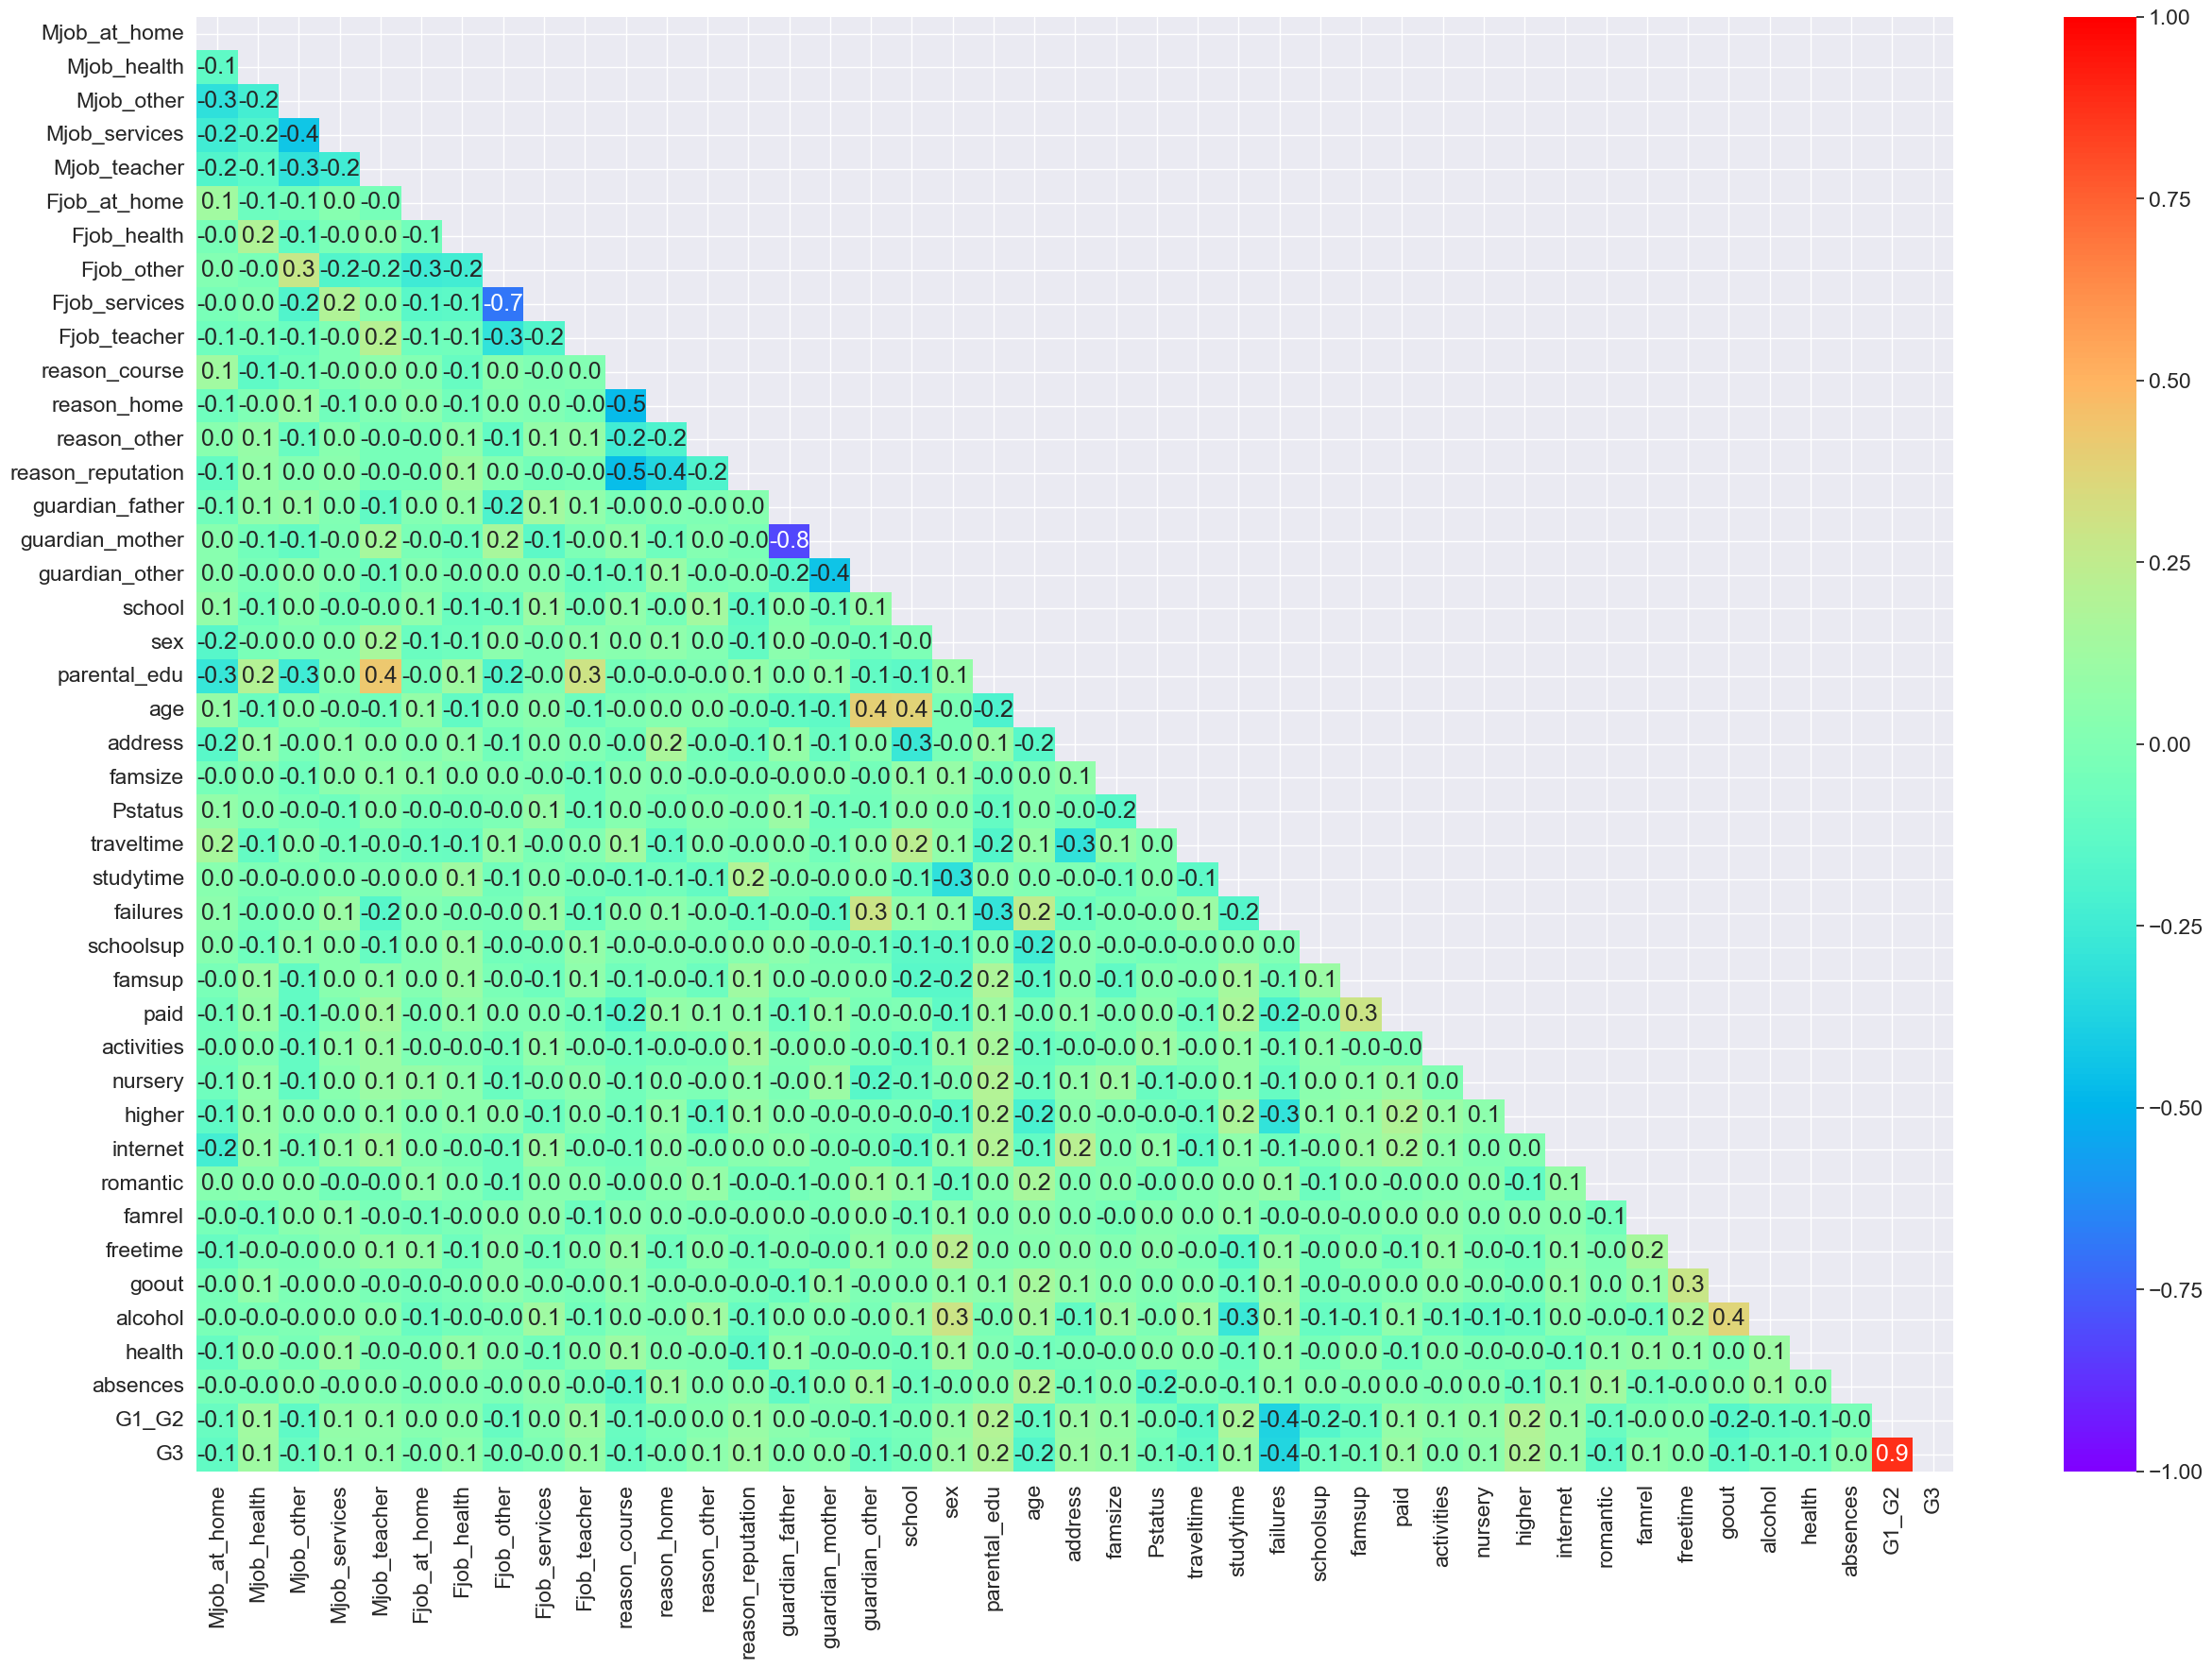

In [8664]:
df_corr = df_scaled.corr()
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(df_corr, mask=mask, vmin=-1, vmax=1, annot=True, fmt='.1f', cmap='rainbow', ax=ax)
plt.show()

In [8665]:
# select features with an absolute correlation greater than 0.1
corr = df_scaled.corr()
corr_features = corr.index[abs(corr['G3']) > 0.1]
corr_features

Index(['Mjob_at_home', 'Mjob_health', 'reason_reputation', 'sex',
       'parental_edu', 'age', 'address', 'traveltime', 'studytime', 'failures',
       'paid', 'higher', 'romantic', 'goout', 'G1_G2', 'G3'],
      dtype='object')

In [8666]:
df_final = df_scaled[corr_features]
df_final.head()

,Mjob_at_home,Mjob_health,reason_reputation,sex,parental_edu,age,address,traveltime,studytime,failures,paid,higher,romantic,goout,G1_G2,G3
0,1,0,0,0,1.255559,1.029417,1,0.836597,-0.037012,-0.445132,0,1,0,0.813319,-1.428892,6
1,1,0,0,0,-1.630983,0.243649,1,-0.641773,-0.037012,-0.445132,0,1,0,-0.091148,-1.725238,6
2,1,0,0,0,-1.630983,-1.327887,1,-0.641773,-0.037012,3.592354,1,1,0,-0.995615,-0.836201,10
3,0,1,0,0,0.293378,-1.327887,1,-0.641773,1.156614,-0.445132,1,1,1,-0.995615,0.941874,15
4,0,0,0,0,0.293378,-0.542119,1,-0.641773,-0.037012,-0.445132,1,1,0,-0.995615,-0.836201,10


In [8667]:
#drop Mjob_at_home and Mjbo_health
df_final = df_final.drop(['Mjob_at_home', 'Mjob_health', 'reason_reputation'], axis=1)

In [8668]:
features = df_final.drop(['G3'], axis=1)
label = df_final['G3']

In [8669]:
for i in range(1, 500):

  X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=i)

  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)

  train_score = lr.score(X_train, y_train)
  test_score = lr.score(X_test, y_test)

  if test_score > train_score:
    print('Test score {}, Train score {}, i {}'.format(test_score, train_score, i))


Test score 0.8339594534415171, Train score 0.7743425862915794, i 11
Test score 0.7973923919731845, Train score 0.7801331048475253, i 13
Test score 0.8156874303830266, Train score 0.7749985660880365, i 17
Test score 0.8337334358104287, Train score 0.7688364613966483, i 23
Test score 0.8081030281708295, Train score 0.7779103363669634, i 24
Test score 0.7870245575208359, Train score 0.7831051883055532, i 27
Test score 0.7985103707826591, Train score 0.7809186928040592, i 28
Test score 0.7848019707397763, Train score 0.7800884903490171, i 29
Test score 0.8038808229201518, Train score 0.7793499543636638, i 31
Test score 0.8230596470770694, Train score 0.7733670170018081, i 38
Test score 0.7831159323888746, Train score 0.7805505342988028, i 40
Test score 0.7886454326709057, Train score 0.7818419267121486, i 41
Test score 0.7830981700082746, Train score 0.7810172648974704, i 46
Test score 0.7980834479067282, Train score 0.7759783052006113, i 47
Test score 0.836161161987901, Train score 0.7674

<b>Observation:</b>

iteration 201 gives the best model

In [8674]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=201)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Training score: {}'.format(lr.score(X_train, y_train)))
print('Testing score: {}'.format(lr.score(X_test, y_test)))

r2_score(y_train, lr.predict(X_train)), r2_score(y_test, lr.predict(X_test))

Training score: 0.7578028064506783
Testing score: 0.8766929335881741


(0.7578028064506783, 0.8766929335881741)